# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Sebastian Silva

## What does a Simple Linear Regression Model do?
#### It predicts the relationship between an independent variable and a dependent variable using a straight line.

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
data = sns.load_dataset('diamonds')

In [6]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
# - Measures the strength and direction of a linear relationship between two variables
# - Ranges from -1 to 1
# - A positive r-value indicates a positive correlation
# - A negative r-value indicates a negative correlation
# - An r-value near 0 suggests no correlation

In [8]:
data.corr(numeric_only=True).head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

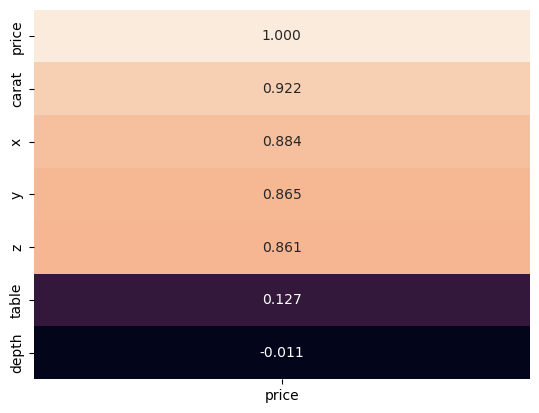

In [9]:
sns.heatmap(data.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot=True, fmt=".3f", cbar=False)

## Procedure for Creating and Using a Regression Model
# 1. Identify the independent and dependent variables
# 2. Split the data into training and testing sets
# 3. Train the model using the training data
# 4. Evaluate the model using the test data

In [11]:
dependent_var = 'price'
independent_var = 'carat'
X = data[[independent_var]]
y = data[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [12]:
model = LinearRegression()
print(model)

LinearRegression()


In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
score = model.score(X_test, y_test)
print(score)

0.8504107786474794


In [15]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[9540.64191438 1940.07543252 3180.98424589 2327.8594367  4421.89305925]


In [16]:
predicted_df = pd.DataFrame(y_pred, columns=['predicted_price'])
predicted_df.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [17]:
results_df = X_test.copy()
results_df['actual_price'] = y_test.values
results_df['predicted_price'] = y_pred
results_df.head()

,carat,actual_price,predicted_price
20244,1.52,8674,9540.641914
45013,0.54,1637,1940.075433
53351,0.70,2657,3180.984246
47212,0.59,1838,2327.859437
1460,0.86,2980,4421.893059


In [18]:
melted_df = results_df.melt(id_vars=['carat'], value_vars=['actual_price', 'predicted_price'], var_name='Type', value_name='Price')
melted_df.head()

,carat,Type,Price
0,1.52,actual_price,8674.0
1,0.54,actual_price,1637.0
2,0.70,actual_price,2657.0
3,0.59,actual_price,1838.0
4,0.86,actual_price,2980.0


C:\Users\sebas\AppData\Local\Temp\ipykernel_19312\1666095656.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted_df, x='carat', y='Price', hue='Type', ci=None)


<Axes: xlabel='carat', ylabel='Price'>

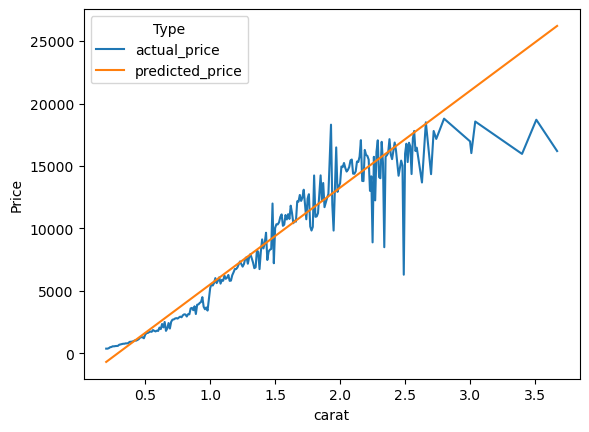

In [19]:
sns.lineplot(data=melted_df, x='carat', y='Price', hue='Type', ci=None)

## Math Behind Regression Line
# - **Slope (m):** Rate of change
# - **Intercept (b):** The y-value when x = 0
# - **Equation:** y = mx + b

In [21]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [22]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [23]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454247


In [24]:
print(f'Regression line equation is y = {m[0]:.2f}x + {b:.2f}')

Regression line equation is y = 7756.43x + -2256.36


In [25]:
estimate_070 = m[0] * 0.70 + b
print(f'The predicted price for a 0.70 carat diamond is ${estimate_070:.2f}')

The predicted price for a 0.70 carat diamond is $3173.14


In [26]:
estimate_054 = m[0] * 0.54 + b
print(f'The predicted price for a 0.54 carat diamond is ${estimate_054:.2f}')

The predicted price for a 0.54 carat diamond is $1932.11


The prices estimated in the previous cells vary from the predicted prices. The .7 carat diamond is significantly further off than the .54 carat diamond.